In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rtb.datasets import get_dataset
ds = get_dataset(name="rtb-grant", root="../../data/", process=True)

saving table foa_info_awards...
done in 0.09 seconds.
saving table foa_info...
done in 0.05 seconds.
saving table institution_awards...


/dfs/user/kexinh/miniconda3/envs/rtb/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


done in 0.11 seconds.
saving table institution...
done in 0.05 seconds.
saving table investigator_awards...
done in 0.20 seconds.
saving table awards...
done in 3.41 seconds.
saving table organization...
done in 0.05 seconds.
saving table investigator...
done in 0.14 seconds.
saving table program_element...
done in 0.04 seconds.
saving table program_reference...
done in 0.02 seconds.
saving table program_element_awards...
done in 0.07 seconds.
saving table program_reference_awards...
done in 0.10 seconds.
loading table ../../data/rtb-grant/processed/db/program_reference.parquet...
done in 0.01 seconds.
loading table ../../data/rtb-grant/processed/db/institution_awards.parquet...
done in 0.04 seconds.
loading table ../../data/rtb-grant/processed/db/investigator.parquet...
done in 0.08 seconds.
loading table ../../data/rtb-grant/processed/db/organization.parquet...
done in 0.00 seconds.
loading table ../../data/rtb-grant/processed/db/program_element.parquet...
done in 0.00 seconds.
loadi

In [19]:
for i,j in ds._db.tables.items():
    print('table', i, ', len: ', str(len(j)))

table program_reference , len:  2025
table institution_awards , len:  402725
table investigator , len:  150196
table organization , len:  475
table program_element , len:  12689
table awards , len:  415838
table foa_info_awards , len:  395337
table institution , len:  16691
table program_element_awards , len:  346917
table investigator_awards , len:  619898
table foa_info , len:  200
table program_reference_awards , len:  552484


In [32]:
task_name = "institution_one_year"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('365 days 06:00:00')

In [33]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [8]:
train_table.df

,window_min_time,window_max_time,name,award_sum
0,2009-01-04 06:00:01,2010-01-04 12:00:01,15171.0,65151583.0
1,2009-01-04 06:00:01,2010-01-04 12:00:01,15322.0,18005480.0
2,2009-01-04 06:00:01,2010-01-04 12:00:01,15668.0,55909715.0
3,2009-01-04 06:00:01,2010-01-04 12:00:01,10834.0,8569661.0
4,2009-01-04 06:00:01,2010-01-04 12:00:01,15177.0,42405557.0
...,...,...,...,...
45248,2000-01-05 00:00:01,2001-01-04 06:00:01,2560.0,43657.0
45249,2000-01-05 00:00:01,2001-01-04 06:00:01,16172.0,29980.0
45250,2000-01-05 00:00:01,2001-01-04 06:00:01,14892.0,2734.0
45251,1999-01-04 18:00:01,2000-01-05 00:00:01,701.0,100000.0


In [36]:
ds.train_max_time

Timestamp('2010-12-31 00:00:00')

In [35]:
train_table.df.window_max_time.max()

Timestamp('2010-01-04 12:00:01')

In [37]:
train_table.df.window_min_time.min()

Timestamp('1976-01-05 00:00:01')

In [9]:
val_table.df

,window_min_time,window_max_time,name,award_sum
0,2010-12-31 00:00:01,2011-12-31 06:00:00,10150.0,14420242.0
1,2010-12-31 00:00:01,2011-12-31 06:00:00,8661.0,1.0
2,2010-12-31 00:00:01,2011-12-31 06:00:00,14997.0,7368981.0
3,2010-12-31 00:00:01,2011-12-31 06:00:00,10610.0,2974212.0
4,2010-12-31 00:00:01,2011-12-31 06:00:00,3593.0,1914913.0
...,...,...,...,...
1663,2010-12-31 00:00:01,2011-12-31 06:00:00,5872.0,144000.0
1664,2010-12-31 00:00:01,2011-12-31 06:00:00,3867.0,44444.0
1665,2010-12-31 00:00:01,2011-12-31 06:00:00,15533.0,21978483.0
1666,2010-12-31 00:00:01,2011-12-31 06:00:00,2796.0,135000.0


In [38]:
val_table.df.window_min_time.min()

Timestamp('2010-12-31 00:00:01')

In [40]:
val_table.df.window_max_time.max()

Timestamp('2011-12-31 06:00:00')

In [10]:
test_table.df

,window_min_time,window_max_time,name
0,2013-12-31 00:00:01,2014-12-31 06:00:00,9619.0
1,2013-12-31 00:00:01,2014-12-31 06:00:00,6682.0
2,2013-12-31 00:00:01,2014-12-31 06:00:00,9520.0
3,2013-12-31 00:00:01,2014-12-31 06:00:00,13813.0
4,2013-12-31 00:00:01,2014-12-31 06:00:00,15186.0
...,...,...,...
1597,2013-12-31 00:00:01,2014-12-31 06:00:00,3682.0
1598,2013-12-31 00:00:01,2014-12-31 06:00:00,4444.0
1599,2013-12-31 00:00:01,2014-12-31 06:00:00,10191.0
1600,2013-12-31 00:00:01,2014-12-31 06:00:00,7810.0


In [41]:
test_table.df.window_min_time.min()

Timestamp('2013-12-31 00:00:01')

In [42]:
test_table.df.window_max_time.max()

Timestamp('2014-12-31 06:00:00')

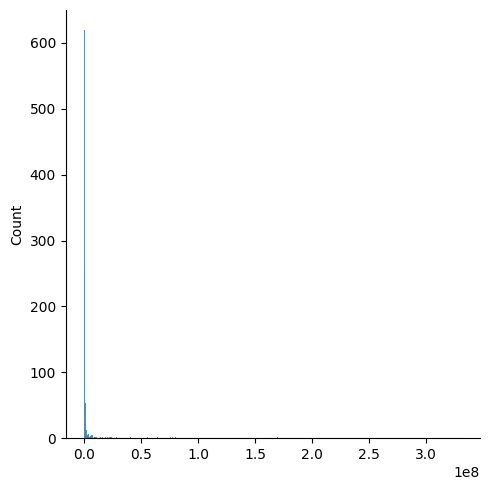

In [20]:
import seaborn as sns
sns.displot(val_table.df.award_sum.values)
## very skewed 

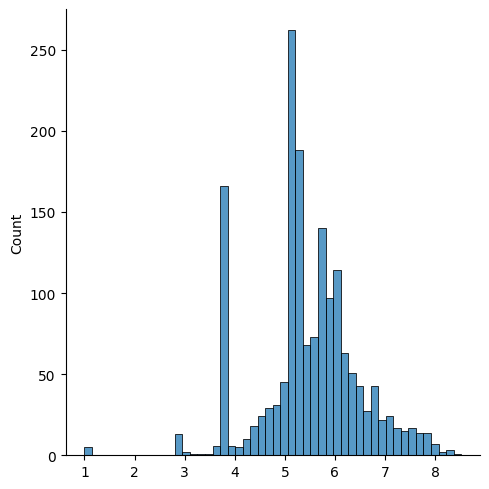

In [22]:
import numpy as np
sns.displot(np.log10(10 + val_table.df.award_sum.values))
## log-scale

In [23]:
task_name = "investigator_three_years"
window_size = ds.tasks_window_size[task_name]
window_size

Timedelta('1095 days 18:00:00')

In [24]:
train_table = ds.make_train_table(task_name, window_size)
val_table = ds.make_val_table(task_name, window_size)
test_table = ds.make_test_table(task_name, window_size)

In [25]:
train_table.df

,window_min_time,window_max_time,email_id,award_sum
0,2006-01-04 12:00:01,2009-01-04 06:00:01,47451.0,1291445.0
1,2006-01-04 12:00:01,2009-01-04 06:00:01,39728.0,396684.0
2,2006-01-04 12:00:01,2009-01-04 06:00:01,68316.0,1000000.0
3,2006-01-04 12:00:01,2009-01-04 06:00:01,104961.0,145678.0
4,2006-01-04 12:00:01,2009-01-04 06:00:01,120988.0,694863.0
...,...,...,...,...
247755,2006-01-04 12:00:01,2009-01-04 06:00:01,68076.0,717718.0
247756,2006-01-04 12:00:01,2009-01-04 06:00:01,60401.0,12000.0
247757,2006-01-04 12:00:01,2009-01-04 06:00:01,112832.0,488765.0
247758,2006-01-04 12:00:01,2009-01-04 06:00:01,134458.0,200000.0


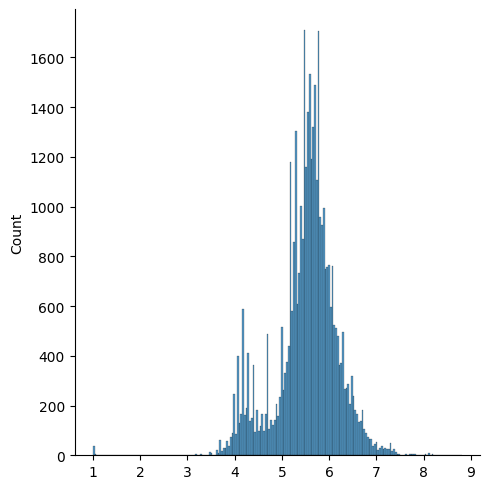

In [26]:
import numpy as np
sns.displot(np.log10(10 + val_table.df.award_sum.values))
## log-scale